In [2]:
import os
import json
import glob

### Understanding Basics

In [3]:
data_root = '../data/'
with open(os.path.join(data_root, 'pvsg.json'), 'r') as f:
    anno = json.load(f)

In [4]:
print('Keys inside pvsg.json:', list(anno.keys()))
print('Number of Object Classes:', len(anno['objects']['thing']))
print('Number of Stuff Classes:', len(anno['objects']['stuff']))
print('Number of Relation Classes:', len(anno['relations']))

Keys inside pvsg.json: ['objects', 'relations', 'split', 'data']
Number of Object Classes: 115
Number of Stuff Classes: 11
Number of Relation Classes: 57


In [5]:
# See video id in anno['split'].
# In this notebook we use 0001_4164158586 from vidor as example.
data = {data_dict['video_id']: data_dict for data_dict in anno['data']}
vid = '0001_4164158586'
data[vid]
# Each video has info of video_id, meta, objects, relations, captions, qa_pairs, and summary.

{'video_id': '0001_4164158586',
 'meta': {'height': 360,
  'width': 480,
  'fps': 5,
  'duration': 36.0,
  'num_frames': 180},
 'objects': [{'object_id': 1,
   'category': 'wall',
   'is_thing': False,
   'status': []},
  {'object_id': 2, 'category': 'countertop', 'is_thing': True, 'status': []},
  {'object_id': 3, 'category': 'microwave', 'is_thing': True, 'status': []},
  {'object_id': 4, 'category': 'cabinet', 'is_thing': True, 'status': []},
  {'object_id': 5, 'category': 'door', 'is_thing': True, 'status': []},
  {'object_id': 6, 'category': 'fridge', 'is_thing': True, 'status': []},
  {'object_id': 7, 'category': 'adult', 'is_thing': True, 'status': []},
  {'object_id': 8, 'category': 'child', 'is_thing': True, 'status': []},
  {'object_id': 9, 'category': 'table', 'is_thing': True, 'status': []},
  {'object_id': 10, 'category': 'chair', 'is_thing': True, 'status': []},
  {'object_id': 11, 'category': 'candle', 'is_thing': True, 'status': []},
  {'object_id': 12, 'category': 'cak

### Understanding Objects

In [6]:
# Each video has info of video_id, meta, objects, relations, captions, qa_pairs, and summary.
# We first understand objects.
# get frame_id from the video
frame_id = 0
img_name = os.path.join(data_root, 'vidor', 'frames', vid, f'{str(frame_id).zfill(4)}.png')
mask_name = os.path.join(data_root, 'vidor', 'masks', vid, f'{str(frame_id).zfill(4)}.png')

from PIL import Image, ImageDraw
image = Image.open(img_name)
mask = Image.open(mask_name)

# Since mask is in mode P, we convert it into numpy for very intuitive mask representation.
import numpy as np
mask = np.array(mask)
print("Mask in p mode, value indicates object id:")
print(mask)

Mask in p mode, value indicates object id:
[[5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 ...
 [5 5 5 ... 9 9 9]
 [5 5 5 ... 9 9 9]
 [5 5 5 ... 9 9 9]]


In [7]:
# Let's focus on object_id = 7
data[vid]['objects'][6]

{'object_id': 7, 'category': 'adult', 'is_thing': True, 'status': []}

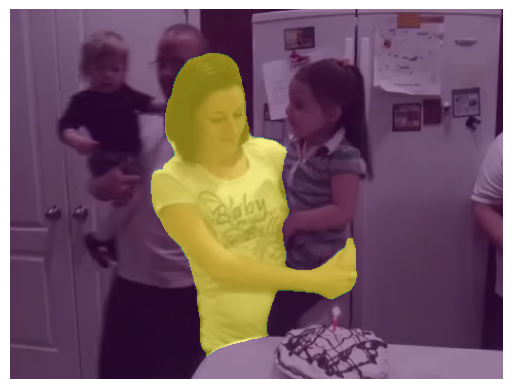

In [8]:
# We can get the mask for this object via the following code
# For example, to see the mask for object_id = 7, simply use (mask == 7)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.imshow(mask == 7, alpha=0.5)
plt.axis('off')
plt.show()

### Understanding Relations

In [9]:
# Now you understand the key "objects", then let's look at relations.
data[vid]['relations']

[[27, 23, 'holding', [[102, 110]]],
 [29, 18, 'holding', [[87, 101]]],
 [7, 8, 'holding', [[0, 86], [119, 125], [145, 179]]],
 [22, 17, 'holding', [[0, 6], [125, 148]]],
 [7, 12, 'looking at', [[0, 2], [55, 62]]],
 [7, 8, 'looking at', [[17, 54], [63, 84], [166, 171]]],
 [8, 12, 'looking at', [[4, 10], [36, 43]]],
 [7, 11, 'blowing', [[157, 166]]],
 [8, 11, 'blowing', [[157, 166]]],
 [8, 12, 'pointing to', [[171, 179]]],
 [11, 12, 'on', [[0, 179]]],
 [12, 9, 'on', [[0, 179]]],
 [20, 9, 'on', [[0, 179]]],
 [16, 11, 'picking', [[171, 179]]],
 [23, 9, 'sitting on', [[103, 110]]]]

[27, 23, 'holding', [[102, 110]]] means the object_id=27 is holding object_id=23 during frame 102 to frame 110, inclusively. 

Below we plot the relation.

In [10]:
# visualization
def draw_selected_mask(mask, draw):
    color = (255, 0, 0, 153)
    nonzero_coords = np.transpose(np.nonzero(mask))
    for coord in nonzero_coords:
        draw.point(coord[::-1], fill=color)
        
def draw_object_mask(mask, draw):
    color = (0, 0, 255, 153)
    nonzero_coords = np.transpose(np.nonzero(mask))
    for coord in nonzero_coords:
        draw.point(coord[::-1], fill=color)

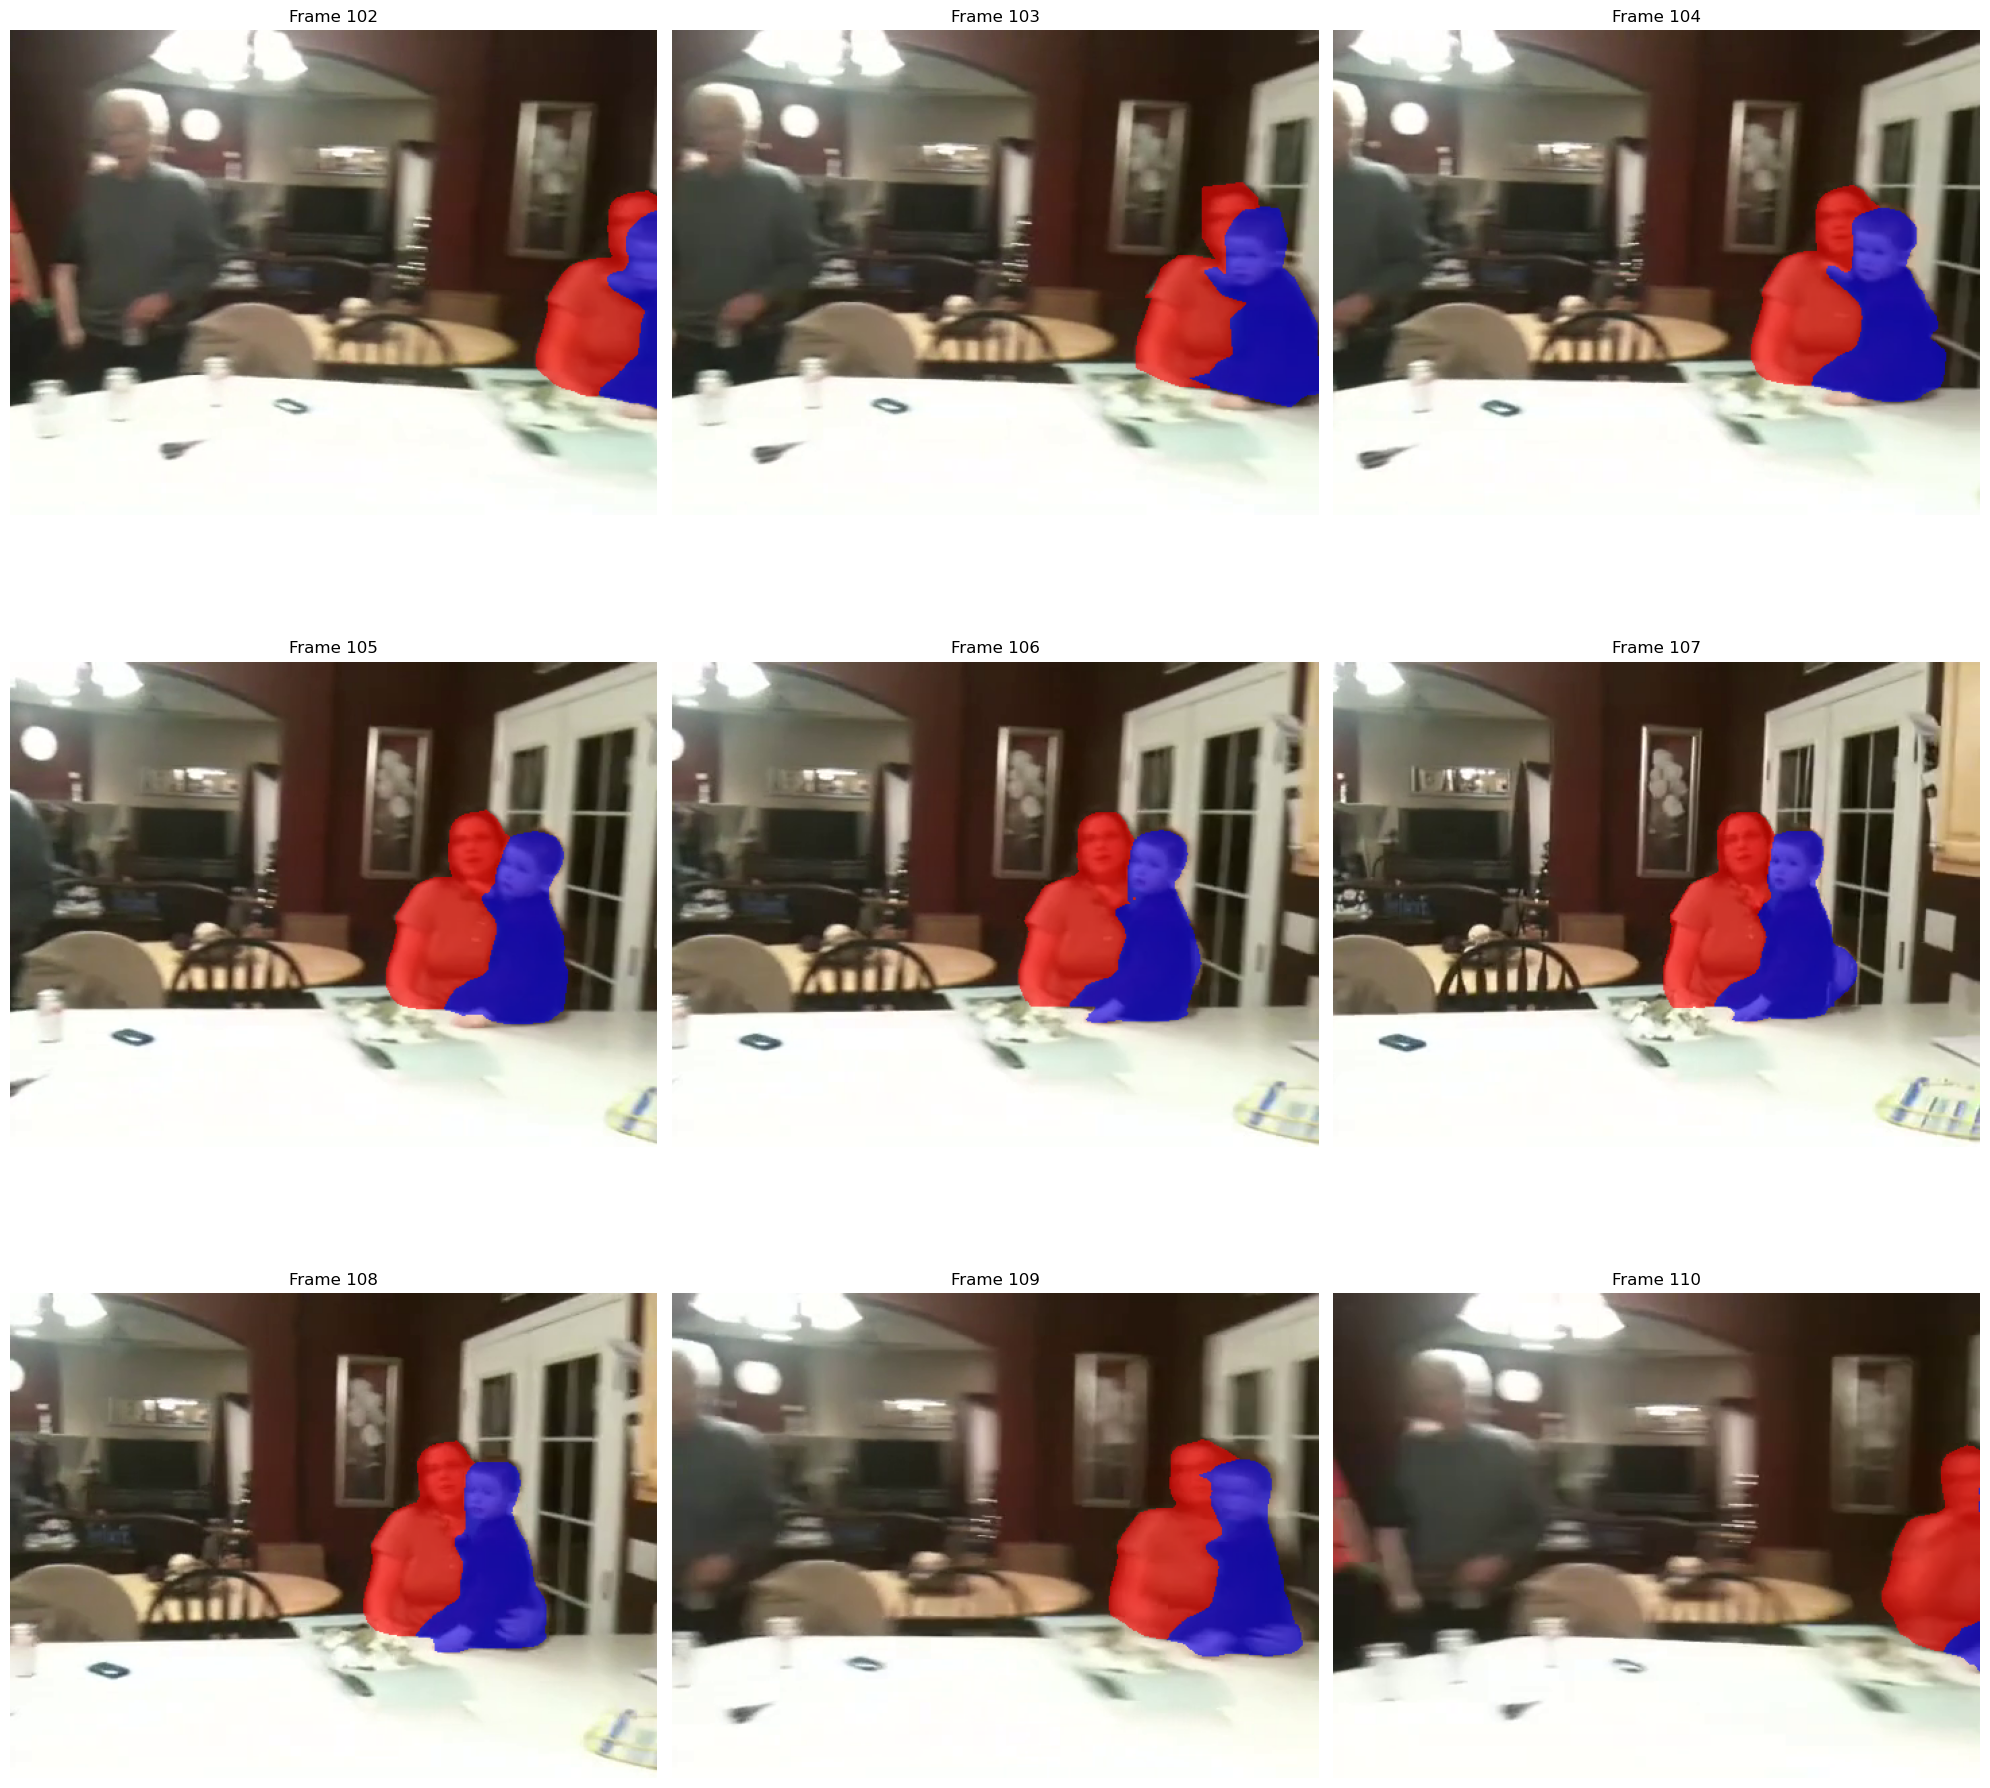

In [11]:
# [27, 23, 'holding', [[102, 110]]]
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, frame_id in enumerate(range(102, 110 + 1)):
    img_name = os.path.join(data_root, 'vidor', 'frames', vid, f'{str(frame_id).zfill(4)}.png')
    mask_name = os.path.join(data_root, 'vidor', 'masks', vid, f'{str(frame_id).zfill(4)}.png')
    
    image = Image.open(img_name)
    mask = Image.open(mask_name)
    mask = np.array(mask)
    
    pil_image = image.convert('RGBA')    
    mask_image = Image.new('RGBA', pil_image.size, color=(0, 0, 0, 0))
    mask_draw = ImageDraw.Draw(mask_image)

    draw_selected_mask(mask == 27, mask_draw) # subject plot red
    draw_object_mask(mask == 23, mask_draw) # object plot blue

    current_pil_image = pil_image.copy()
    current_pil_image.alpha_composite(mask_image)
    
    ax = axes[i // 3, i % 3]
    ax.imshow(current_pil_image)
    ax.axis('off')
    ax.set_title(f"Frame {frame_id}")

plt.tight_layout()
plt.show()

### Understanding Caption and QA Pairs

We also provide captioning, qa pairs, and video summary. The number in brackets represents the object id.

In [12]:
data[vid]['captions']

[{'time': '0000-0008',
  'description': 'A man (22) carries a child (17) and walks to the left from behind a woman (7) holding another child (8).'},
 {'time': '0009-0047',
  'description': 'The woman (7) rocks and holds the child (8), singing a birthday song together with another woman (25) to celebrate the birthday of the girl (8).'},
 {'time': '0048-0079',
  'description': 'The woman (7) smiles and holds the child (8) in front of the cake (12).'},
 {'time': '0080-0122',
  'description': "The camera shifts to the right, showing a woman (25), a man (28), a woman (29) holding a baby (baby-1), two men (30) (26), and a woman (27) holding a boy (23), all singing a birthday song to celebrate the girl's (8) birthday."},
 {'time': '0123-0155',
  'description': "The woman (7) on the left side, holding the child (17), and the man (22) and woman (16) are singing a birthday song to celebrate the girl (8)'s birthday."},
 {'time': '0156-0179',
  'description': 'The girl (8) and the woman (7) blow o

In [13]:
data[vid]['qa_pairs']

[{'time': '0018',
  'question': 'Why are the woman (7) and the girl (8) smiling?',
  'answer': "Because it's the girl (8)'s birthday, and they (7) (8) are very happy."},
 {'time': '0058',
  'question': 'Why is the man (28) singing?',
  'answer': "Because he is celebrating the girl (8)'s birthday and singing a birthday song for her."},
 {'time': '0128',
  'question': 'Why is the woman (16) dancing and gesturing with her hands?',
  'answer': "Because she is adding to the festive atmosphere and making the girl (8)'s birthday celebration lively."},
 {'time': '0158',
  'question': 'Why is the woman (7) bending down?',
  'answer': 'Because she (7) is going to blow out the candles together with the little girl (8).'}]

In [14]:
data[vid]['summary']

'A scene where a group of adults and children celebrate the birthday of a little girl'